## Marketing Attribution Analysis


### Table of Contents
- [Introduction](#intro)
- [Customer Behaviour Pattern](#purchase_pattern)
- [Attribution on Weekly Level](#weekly)
- [Attribution on Hourly Level](#hourly)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

The dataset is from an online beauty store in Germany, which includes customer journey from various marketing channels, and each customers' total purchase amount. 
The purpose of the analysis is to find out the most effective channel, in order to maximise the impact of our marketing cost spending.

### Data Preprocessing

In [406]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

In [407]:
df = pd.read_csv('attribution.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [408]:
df.drop_duplicates(inplace = True)
df[df.isnull()].count()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

In [409]:
# handling time & date

from datetime import datetime, timedelta

df['time'] = pd.to_datetime(df['time'])

df['dayofweek'] = df['time'].dt.dayofweek
df['hour'] = df['time'].dt.hour

def week_number_of_month(date_value):
     return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1])
df['weekofmonth'] = df['time'].apply(week_number_of_month)

In [410]:
def week_eng(date_value):
    if date_value == 0:
        return "0_Mon"
    elif date_value == 1:
        return "1_Tue"
    elif date_value == 2:
        return "2_Wed"
    elif date_value == 3:
        return "3_Thu"
    elif date_value == 4:
        return "4_Fri"
    elif date_value == 5:
        return "5_Sat"
    else:
        return "6_Sun"

df['dayofweek'] = df['dayofweek'].apply(week_eng)

In [411]:
bins = [0,7,12,18,22,24]
labels = ['5_night_to_dawn', '1_morning', '2_afternoon','3_evening', '4_until_midnight']
df['hour_group'] = pd.cut(df['hour'], bins, right = False, labels = labels)

df.head()

,cookie,time,interaction,conversion,conversion_value,channel,dayofweek,hour,weekofmonth,hour_group
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11+00:00,impression,0,0.0,Instagram,1_Tue,13,1,2_afternoon
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07+00:00,impression,0,0.0,Online Display,1_Tue,19,3,3_evening
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46+00:00,impression,0,0.0,Online Display,1_Tue,15,4,2_afternoon
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51+00:00,impression,0,0.0,Online Display,6_Sun,7,4,1_morning
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57+00:00,impression,0,0.0,Paid Search,1_Tue,9,1,1_morning


<a id='purchase_pattern'></a>
### Customer Behaviour Pattern

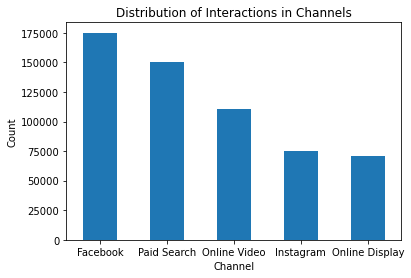

In [412]:
####이거


# What is the overall distribution of the different channels in the dataset? 
# Which channels are most prevalent, and which ones are less common?

channel_counts = df['channel'].value_counts()
plt.figure(figsize=(6, 4))
channel_counts.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Distribution of Interactions in Channels')
plt.xticks(rotation=0)
plt.show()

# 페이스북으로부터의 유입량이 가장 많다. 

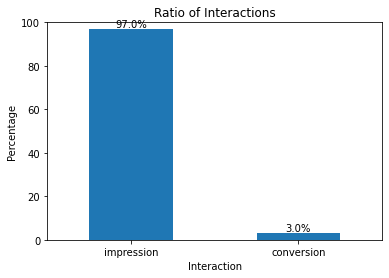

In [413]:
# What is the distribution of interactions (impressions and conversions) in the dataset? 

interaction_percentages = df['interaction'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
interaction_percentages.plot(kind='bar')
plt.xlabel('Interaction')
plt.ylabel('Percentage')
plt.title('Ratio of Interactions')

total_interactions = interaction_percentages.sum()
for i, value in enumerate(interaction_percentages):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.ylim(0, 100) 
plt.show()

# 전체 유입량 중 3%만 전환한다

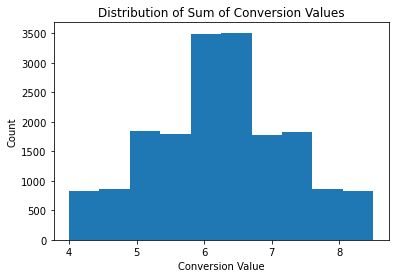

In [414]:
# What is the range and distribution of total conversion values? 

conversion_data = df[df['conversion'] == 1]
plt.figure(figsize=(6, 4))
plt.hist(conversion_data['conversion_value'], bins=10)
plt.xlabel('Conversion Value')
plt.ylabel('Count')
plt.title('Distribution of Sum of Conversion Values')
plt.show()

# 전환했을 때 사용 금액은 대략 6-7유로

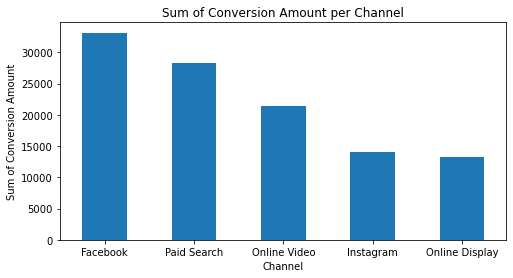

In [415]:
####이거

# 채널별 평균 전환 금액은 다를까? to understand the purchasing tendency of customer

average_conversion_amount = conversion_data.groupby('channel')['conversion_value'].sum()
average_conversion_amount = average_conversion_amount.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
average_conversion_amount.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Sum of Conversion Amount')
plt.title('Sum of Conversion Amount per Channel')
plt.xticks(rotation=0);

# facebook이 가장 돈 많이 쓴다. 하지만 유입량도 많기 떄문에 당연한것.

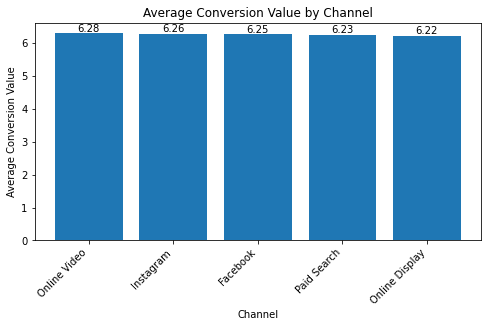

In [416]:
####이거

# average of conversion value by channel

conversion_data = df[df['conversion'] == 1]
average_conversion_per_channel = conversion_data.groupby('channel')['conversion_value'].mean()
average_conversion_per_channel = average_conversion_per_channel.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(average_conversion_per_channel.index, average_conversion_per_channel)
plt.xlabel('Channel')
plt.ylabel('Average Conversion Value')
plt.title('Average Conversion Value by Channel')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(average_conversion_per_channel):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

# 평균 사용 금액은 online video가 높음. 하지만 큰 차이는 아님

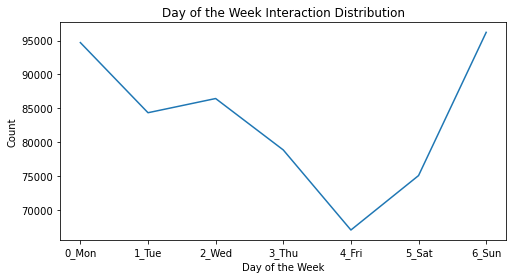

In [417]:
day_counts = df['dayofweek'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
day_counts.plot(kind='line')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Day of the Week Interaction Distribution')
plt.xticks(rotation=0)
plt.show()

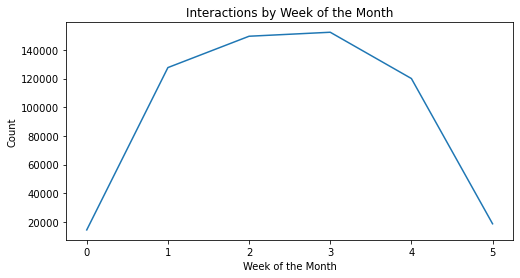

In [418]:
# specific time intervals that consistently show higher or lower interaction rates?

week_counts = df['weekofmonth'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
week_counts.plot(kind='line')
plt.xlabel('Week of the Month')
plt.ylabel('Count')
plt.title('Interactions by Week of the Month')
plt.xticks(rotation=0)
plt.show()

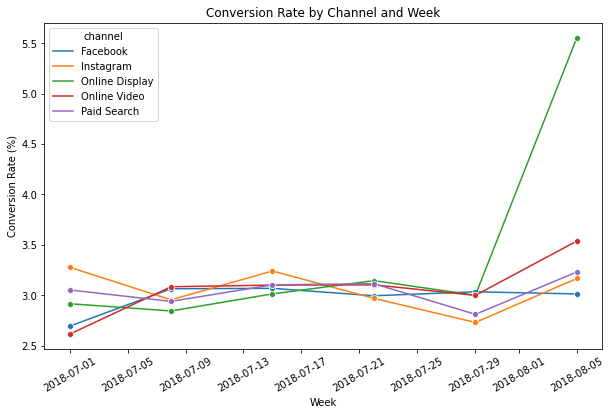

In [420]:
conversions = df.loc[df['conversion'] == 1]
conversion_per_week = conversions.groupby([pd.Grouper(key='time', freq='W'), 'channel'])['conversion'].sum().reset_index()
interactions_per_week = df.groupby([pd.Grouper(key='time', freq='W'), 'channel'])['interaction'].count().reset_index()
merged_data = pd.merge(conversion_per_week, interactions_per_week, on=['time', 'channel'], suffixes=('_conversion', '_interaction'))
merged_data['conversion_rate'] = merged_data['conversion']*100 / merged_data['interaction']

plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='time', y='conversion_rate', hue='channel', marker='o')
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Channel and Week')
plt.xticks(rotation=30)
plt.show()

In [421]:
# 다양한 채널의 전환율은 시간이 지남에 따라 변동합니다. 
# 예를 들어 온라인 디스플레이의 전환율은 2.844%에서 5.556% 사이의 값으로 다른 채널에 비해 더 많이 변화하는 것 같습니다. 
# 이는 전환 유도에 있어 온라인 디스플레이 광고의 효과가 기간에 따라 크게 다를 수 있음을 시사합니다.

# Facebook은 2.693%에서 3.069%에 이르는 상대적으로 높은 전환율을 꾸준히 유지하고 있습니다. 
# 이는 Facebook 광고가 지속적으로 더 높은 전환율을 생성하기 때문에 다른 채널에 비해 전환을 유도하는 데 더 효과적일 수 있음을 나타냅니다.

# 인스타그램은 2.730%에서 3.241%에 이르는 전환율의 약간의 변화를 보여줍니다. 
# 이는 전환을 유도하는 Instagram 광고의 효과가 기간에 따라 변동될 수 있음을 시사합니다.

# 온라인 비디오 및 유료 검색 채널도 전환율이 각각 2.614%에서 3.101% 및 2.811%에서 3.115%로 완만하게 변동합니다. 이
# 는 전환을 유도하는 이러한 채널의 효율성이 다양한 기간 동안 다양한 요인의 영향을 받을 수 있음을 의미합니다.

# 영향을 미칠 수 있는 캠페인 전략, 대상 고객 및 외부 이벤트와 같은 추가 요소를 고려하여

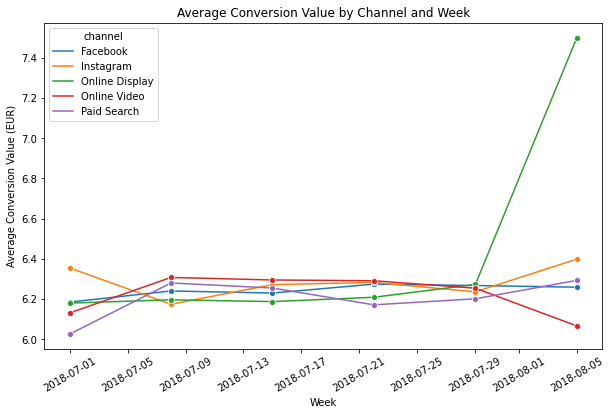

In [422]:
# timeseries에 따른 채널별 전환금액 변화 양상

conversions = df[df['conversion'] == 1]
conversion_amount_per_week = conversions.groupby([pd.Grouper(key='time', freq='W'), 'channel'])['conversion_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion_amount_per_week, x='time', y='conversion_value', hue='channel', marker='o')
plt.xlabel('Week')
plt.ylabel('Average Conversion Value (EUR)')
plt.title('Average Conversion Value by Channel and Week')
plt.xticks(rotation=30)
plt.show()

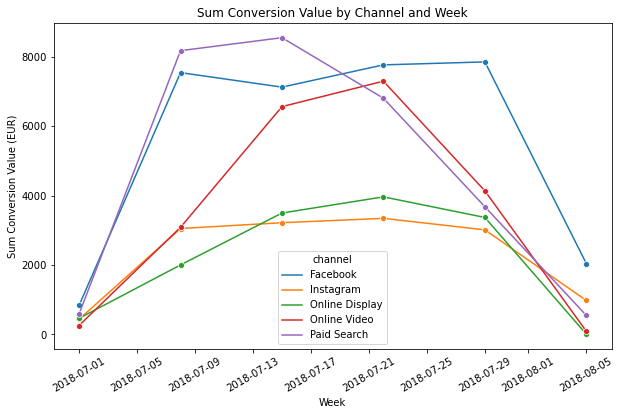

In [423]:
conversions = df[df['conversion'] == 1]
conversion_amount_per_week = conversions.groupby([pd.Grouper(key='time', freq='W'), 'channel'])['conversion_value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion_amount_per_week, x='time', y='conversion_value', hue='channel', marker='o')
plt.xlabel('Week')
plt.ylabel('Sum Conversion Value (EUR)')
plt.title('Sum Conversion Value by Channel and Week')
plt.xticks(rotation=30)
plt.show()

# sum of value에 week이 영향을 미친다.

In [424]:
# 전환 가치 안정성: 채널 전체의 평균 전환 가치는 시간이 지남에 따라 약간의 변동이 있지만 상대적으로 안정적으로 유지됩니다. 
#     이는 채널이 비슷한 평균 값으로 지속적으로 전환을 생성하고 있음을 나타냅니다.

# 채널 비교: 전반적으로 Facebook과 Instagram은 관찰 기간 동안 평균 전환 가치가 비슷했습니다. 
#     온라인 디스플레이와 온라인 동영상도 상대적으로 안정적인 평균 전환 가치를 보이는 반면 유료 검색은 약간 더 많은 변화를 보입니다.

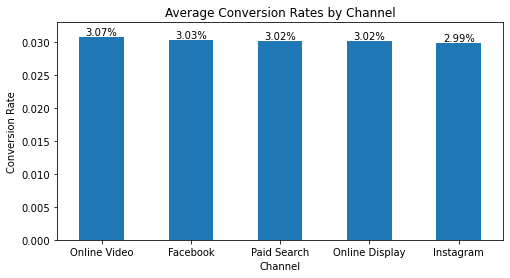

In [425]:
####이거


conversion_rates = df.groupby('channel')['conversion'].mean()
conversion_rates = conversion_rates.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
conversion_rates.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.ylim(0,0.033)
plt.title('Average Conversion Rates by Channel')
plt.xticks(rotation=0)

for index, value in enumerate(conversion_rates):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')

plt.show()

# online video가 액션 기준 가장 전환율이 높다. 
# 건당 평균 사용 금액도 online video가 가장 높았음.

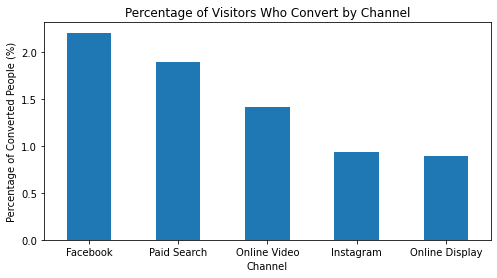

In [426]:
# facebook으로부터 inflow가 가장 많았지만 conversion rate는 online video가 가장 높음.
# 페북의 전환율이 낮다. 보고 혹해서 들어왔는데 안사고 나가는 것

# 그럼 채널당 사람 기준으로 몇%가 사는거지?
total_cookies = df['cookie'].nunique()
conversion_counts = df.loc[df['conversion'] == 1, 'channel'].value_counts()
conversion_percentage = (conversion_counts / total_cookies) * 100
plt.figure(figsize=(8, 4))
conversion_percentage.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Percentage of Converted People (%)')
plt.title('Percentage of Visitors Who Convert by Channel')
plt.xticks(rotation=0)
plt.show()

# 페북의 여러번 들어와야 한번 샀다. 하지만 실제 산 사람 수는 많다. 사기까지의 challenge가 있었을 것. (unfriendly UX...)

In [427]:
# In average, how many interaction is need for a cookie to make a first conversion per channel?

conversions = df[df['conversion'] == 1]
converted_cookies = conversions['cookie'].unique()
converted_data = df[df['cookie'].isin(converted_cookies)]
interactions_until_conversion = converted_data.groupby('cookie')['interaction'].count()
average_interactions = interactions_until_conversion.mean()
print(average_interactions)

3.6170984749702364


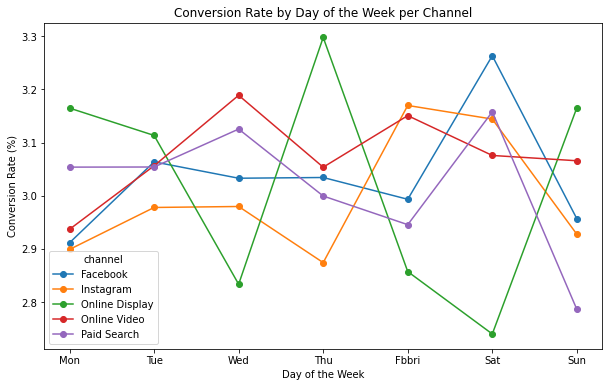

In [428]:
# 채널별 전환율이 요일별로 다를까? (더 구매 의욕을 불러일으킬까?)

conversions = df[df['conversion'] == 1]
conversion_counts = conversions.groupby(['dayofweek', 'channel']).size().unstack().sort_index()
interaction_counts = df.groupby(['dayofweek', 'channel']).size().unstack().sort_index()
conversion_rate = (conversion_counts / interaction_counts) * 100

fig, ax = plt.subplots(figsize=(10, 6))
conversion_rate.plot(marker='o', ax=ax)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fbbri', 'Sat', 'Sun'])
ax.set_title('Conversion Rate by Day of the Week per Channel')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

# 몇몇 채널에서 y축에 요동치는 것이 보임. conversion rate은 day of week의 영향이 있음.

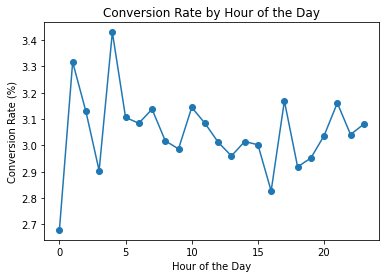

In [429]:
#### 이거

conversion_counts = conversions['hour'].value_counts().sort_index()
interaction_counts = df['hour'].value_counts().sort_index()
conversion_rate = (conversion_counts / interaction_counts) * 100
plt.plot(conversion_rate.index, conversion_rate.values, marker='o')
plt.title('Conversion Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate (%)')
plt.show()

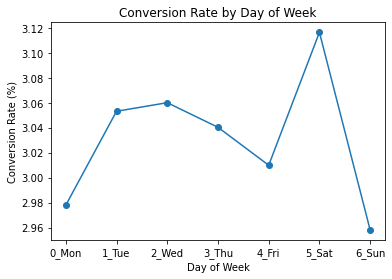

In [474]:
conversion_counts = conversions['dayofweek'].value_counts().sort_index()
interaction_counts = df['dayofweek'].value_counts().sort_index()
conversion_rate = (conversion_counts / interaction_counts) * 100
plt.plot(conversion_rate.index, conversion_rate.values, marker='o')
plt.title('Conversion Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate (%)')
plt.show()

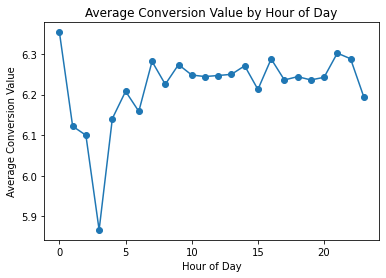

In [471]:
conversions = df.loc[df['conversion'] == 1]
conversion_avg = conversions.groupby('hour')['conversion_value'].mean()

plt.plot(conversion_avg.index, conversion_avg.values, marker='o')
plt.title('Average Conversion Value by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Conversion Value')
plt.show()

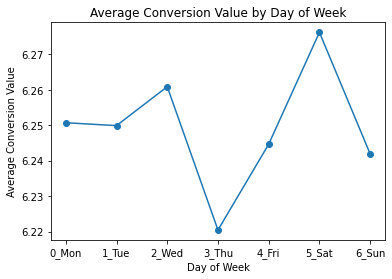

In [475]:
conversions = df.loc[df['conversion'] == 1]
conversion_avg = conversions.groupby('dayofweek')['conversion_value'].mean()

plt.plot(conversion_avg.index, conversion_avg.values, marker='o')
plt.title('Average Conversion Value by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Conversion Value')
plt.show()

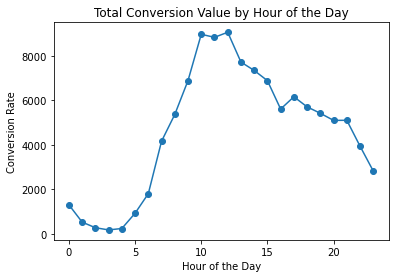

In [463]:
conversion_sum = df.groupby('hour')['conversion_value'].sum().sort_index()

plt.plot(conversion_sum.index, conversion_rate.values, marker='o')
plt.title('Total Conversion Value by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.show()

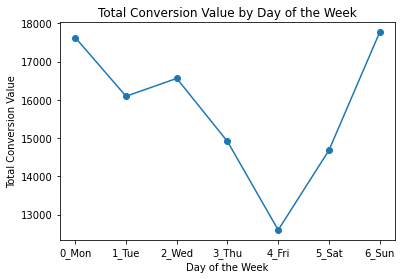

In [470]:
conversions = df.loc[df['conversion'] == 1]
conversion_avg = conversions.groupby('dayofweek')['conversion_value'].sum()

plt.plot(conversion_avg.index, conversion_avg.values, marker='o')
plt.title('Total Conversion Value by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Conversion Value')
plt.show()

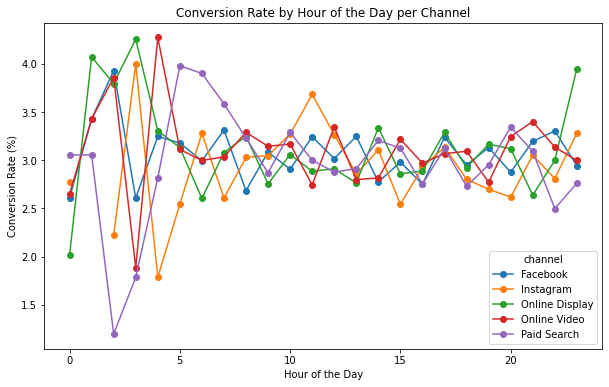

In [430]:
# 채널별 전환율이 시간대별로 다를까?

conversion_counts = conversions.groupby(['hour', 'channel']).size().unstack()
interaction_counts = df.groupby(['hour', 'channel']).size().unstack()
conversion_rate = (conversion_counts / interaction_counts) * 100

fig, ax = plt.subplots(figsize=(10, 6))
conversion_rate.plot(marker='o', ax=ax)
ax.set_title('Conversion Rate by Hour of the Day per Channel')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

# not much of useful insight

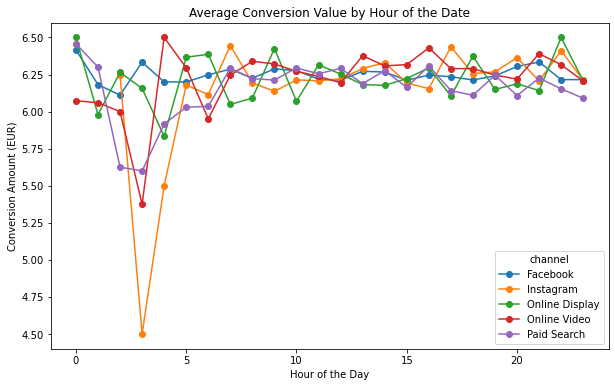

In [431]:
conversion_value = df[df['conversion'] == 1]
conversion_value = conversion_value.groupby(['hour', 'channel'])['conversion_value'].mean().unstack().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
conversion_value.plot(marker='o', ax=ax)
ax.set_title('Average Conversion Value by Hour of the Date')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Conversion Amount (EUR)')
plt.show()

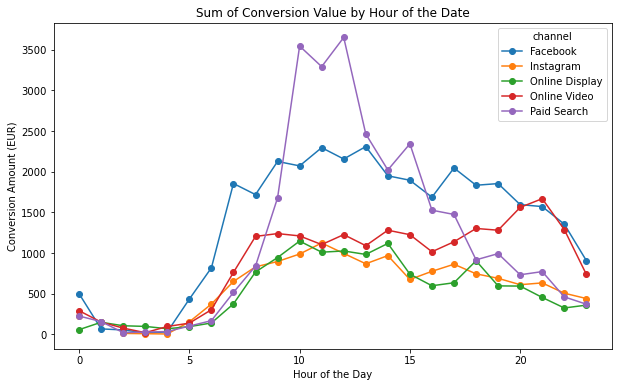

In [432]:
conversion_value = df[df['conversion'] == 1]
conversion_value = conversion_value.groupby(['hour', 'channel'])['conversion_value'].sum().unstack().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
conversion_value.plot(marker='o', ax=ax)
ax.set_title('Sum of Conversion Value by Hour of the Date')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Conversion Amount (EUR)')
plt.show()
# hour of the day has an impact to the conversion value

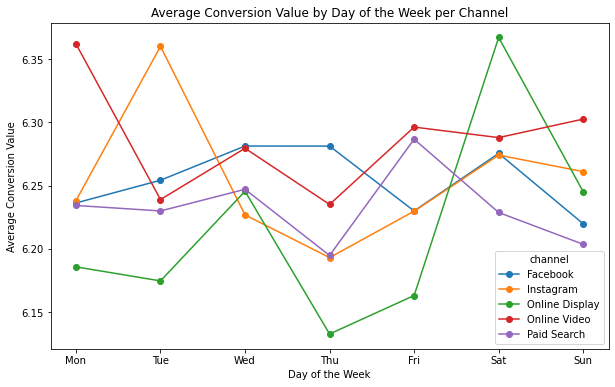

In [433]:
# 채널별 전환액 by day of week by channel

conversion_value = df[df['conversion'] == 1]
conversion_value = conversion_value.groupby(['dayofweek', 'channel'])['conversion_value'].mean().unstack().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
conversion_value.plot(marker='o', ax=ax)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_title('Average Conversion Value by Day of the Week per Channel')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Conversion Value')
plt.show()

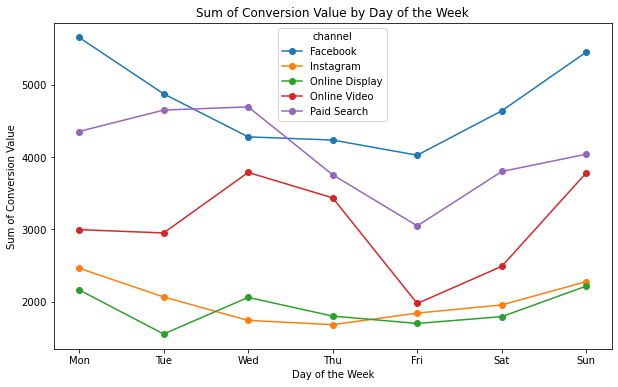

In [434]:
conversion_value = df[df['conversion'] == 1]
conversion_value = conversion_value.groupby(['dayofweek', 'channel'])['conversion_value'].sum().unstack().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
conversion_value.plot(marker='o', ax=ax)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_title('Sum of Conversion Value by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Sum of Conversion Value')
plt.show()

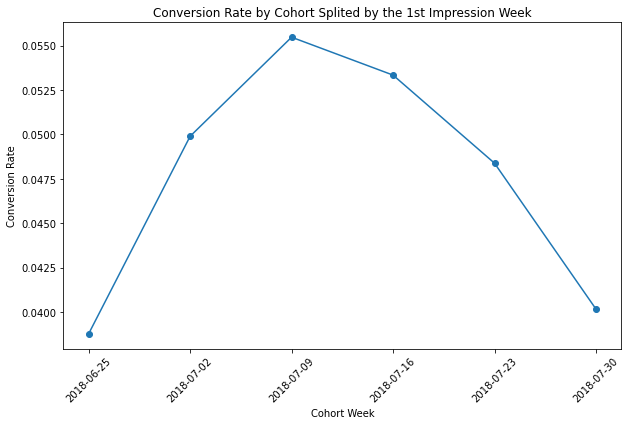

In [435]:
# 코호트별로 보고 싶다. 

# 첫 impression을 한 날짜 기준으로 전환율이 다를까? (사람별 and 인터랙션별) 전환 금액은 어떨까? 
import matplotlib.dates as mdates

df['time'] = pd.to_datetime(df['time'])

df['first_impression_date'] = df['time'].dt.date
df['first_impression_date'] = pd.to_datetime(df['first_impression_date'])
df['first_impression_week'] = df['first_impression_date'] - pd.to_timedelta(df['first_impression_date'].dt.dayofweek, unit='D')
cohort_users = df.groupby('first_impression_week')['cookie'].nunique()
cohort_conversions = df.groupby('first_impression_week')['conversion'].sum()
conversion_rate = cohort_conversions / cohort_users

plt.figure(figsize=(10, 6))
plt.plot(conversion_rate.index, conversion_rate, marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  

plt.xlabel('Cohort Week')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Cohort Splited by the 1st Impression Week')
plt.xticks(rotation=45)
plt.show()

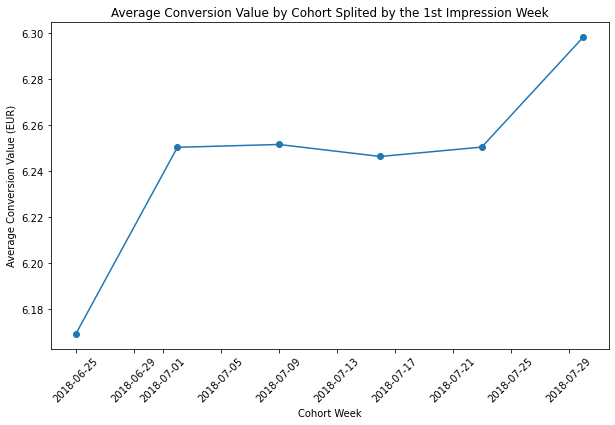

In [436]:
converted_cookies = df[df['conversion'] == 1].copy()
converted_cookies['first_impression_date'] = pd.to_datetime(converted_cookies['first_impression_date'])
converted_cookies['first_impression_week'] = converted_cookies['first_impression_date'] - pd.to_timedelta(converted_cookies['first_impression_date'].dt.dayofweek, unit='D')
average_conversion_value = converted_cookies.groupby('first_impression_week')['conversion_value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_conversion_value.index, average_conversion_value, marker='o')
plt.xlabel('Cohort Week')
plt.ylabel('Average Conversion Value (EUR)')
plt.title('Average Conversion Value by Cohort Splited by the 1st Impression Week')
plt.xticks(rotation=45)
plt.show()

<a id='weekly'></a>
### Attribution on a Weekly Level

In [437]:
# Data Driven Attribution Model 

# logistic regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df = train_df.dropna()
encoder = LabelEncoder()
train_df['channel_encoded'] = encoder.fit_transform(train_df['channel'])

feature = train_df['channel_encoded']
output = train_df['conversion']
model = sm.formula.glm("output ~ feature", train_df, family=sm.families.Binomial()).fit()
print(model.summary())

# since p-value of feature is greater than 0.05, the result is not statistically significant 
# probably because it doesn't take into consideration that users can convert after visiting from the same channel multiple times 
# I have to try Markov chain analysis

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:               466073
Model:                            GLM   Df Residuals:                   466071
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63368.
Date:                Tue, 27 Jun 2023   Deviance:                   1.2674e+05
Time:                        21:41:39   Pearson chi2:                 4.66e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4701      0.014   -254.871      0.0

In [438]:
# step 4. Markov Chain analysis

df = df.sort_values(['cookie', 'time'])
df['next_channel'] = df.groupby('cookie')['channel'].shift(-1)
df['day_of_week'] = df['time'].dt.dayofweek
df['hour_of_day'] = df['time'].dt.hour
channels = df['channel'].unique()
days_of_week = df['day_of_week'].unique()
hours_of_day = df['hour_of_day'].unique()

transition_matrices = {}
for day in days_of_week:
    df_day = df[df['day_of_week'] == day]
    transition_matrix_day = pd.DataFrame(index=channels, columns=channels, dtype=float)
    
    for channel in channels:
        channel_counts = df_day[df_day['channel'] == channel]['next_channel'].value_counts()
        transition_matrix_day.loc[channel] = channel_counts
    transition_matrices[day] = transition_matrix_day

In [439]:
attribution_adjustments = {}

for day, transition_matrix in transition_matrices.items():
    attribution_weight_adjustment = pd.DataFrame(np.ones_like(transition_matrix.values),
                                                index=transition_matrix.index,
                                                columns=transition_matrix.columns)
    for channel, _ in transition_matrix.iterrows():
        attribution_weight_adjustment.loc[channel] = 0
        remaining_weights_sum = attribution_weight_adjustment.sum(axis=1).values
        remaining_weights_sum[remaining_weights_sum == 0] = 1
        attribution_weight_adjustment.loc[channel] = 1 / remaining_weights_sum
    attribution_weight_adjustment = attribution_weight_adjustment.div(attribution_weight_adjustment.sum(axis=1),
                                                                     axis=0)

    attribution_adjustments[day] = attribution_weight_adjustment

In [440]:
conversion_rate_per_day = {}

for day, attribution_adjustment in attribution_adjustments.items():
    conversions = df[df['conversion'] == 1]
    conversion_counts = conversions[conversions['day_of_week'] == day]['channel'].value_counts()
    interaction_counts = df[df['day_of_week'] == day]['channel'].value_counts()
    conversion_rate = (conversion_counts / interaction_counts) * 100
    attribution_adjusted_conversion_rate = conversion_rate * attribution_adjustment
    conversion_rate_per_day[day] = attribution_adjusted_conversion_rate

<Figure size 720x432 with 0 Axes>

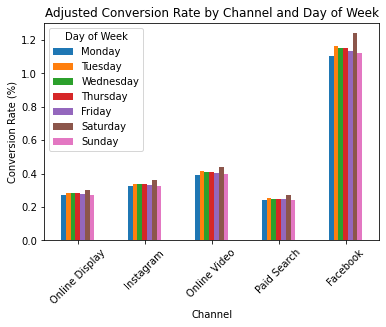

In [441]:
import calendar
day_of_week_mapping = {6:'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}

sorted_days = [day_of_week_mapping[day] for day in sorted(conversion_rate_per_day.keys())]

unique_channels = set()
for conversion_counts in conversion_rate_per_day.values():
    unique_channels.update(conversion_counts.index)
adjusted_conversion_rate_data = pd.DataFrame(columns=unique_channels)

for day, conversion_counts in conversion_rate_per_day.items():
    conversion_counts_df = pd.DataFrame(conversion_counts).transpose()
    conversion_counts_df = conversion_counts_df.reindex(columns=unique_channels)
    adjusted_conversion_rate_data.loc[day_of_week_mapping[day]] = conversion_counts_df.values[0]
adjusted_conversion_rate_data.index.name = 'Day'

plt.figure(figsize=(10, 6))
adjusted_conversion_rate_data = adjusted_conversion_rate_data.reindex(sorted_days) 
adjusted_conversion_rate_data.transpose().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.title('Adjusted Conversion Rate by Channel and Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Day of Week')
plt.show()

<Figure size 720x432 with 0 Axes>

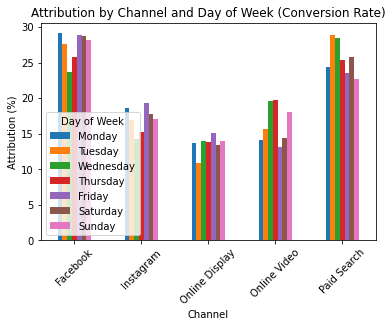

In [442]:
conversions = df[df['conversion'] == 1]

attribution_conversion_rate_per_day = {}
for day, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['day_of_week'] == day
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_count_adjusted'] = 1 * adjustment_values
    adjusted_channel_conversion_count = conversions[mask].groupby('channel')['conversion_count_adjusted'].sum()
    total_conversions = adjusted_channel_conversion_count.sum()
    attribution_conversion_rate = adjusted_channel_conversion_count / total_conversions * 100
    attribution_conversion_rate_per_day[day] = attribution_conversion_rate

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attribution_data = pd.DataFrame(attribution_conversion_rate_per_day).sort_index(axis=1)
attribution_data.columns = day_names

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution (%)')
plt.title('Attribution by Channel and Day of Week (Conversion Rate)')
plt.xticks(rotation=45)
plt.legend(title='Day of Week', loc='lower left', ncol=1)
plt.show()

<Figure size 720x432 with 0 Axes>

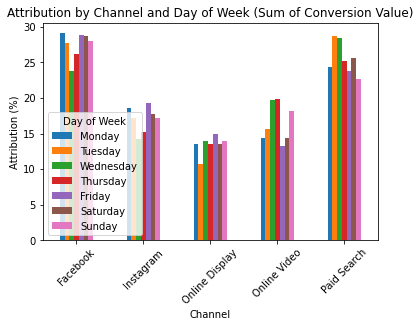

In [443]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

attribution_conversion_value_per_day = {}
for day, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['day_of_week'] == day
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
    adjusted_channel_conversion_value = conversions[mask].groupby('channel')['conversion_value_adjusted'].sum()
    attribution_conversion_value = adjusted_channel_conversion_value / adjusted_channel_conversion_value.sum() * 100
    attribution_conversion_value_per_day[day] = attribution_conversion_value
attribution_data = pd.DataFrame(attribution_conversion_value_per_day).sort_index(axis=1)
attribution_data.columns = day_names

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution (%)')
plt.title('Attribution by Channel and Day of Week (Sum of Conversion Value)')
plt.xticks(rotation=45)
plt.legend(title='Day of Week', loc = 'lower left')
plt.show()

<Figure size 720x432 with 0 Axes>

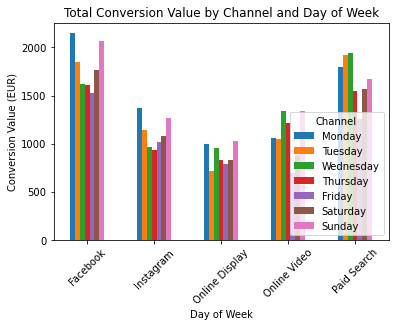

In [444]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

for day, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['day_of_week'] == day
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values

adjusted_channel_conversion_value = conversions.groupby(['channel', 'day_of_week'])['conversion_value_adjusted'].sum().unstack()
adjusted_channel_conversion_value = adjusted_channel_conversion_value.rename(columns=dict(enumerate(day_names)))

plt.figure(figsize=(10, 6))
adjusted_channel_conversion_value.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Value (EUR)')
plt.title('Total Conversion Value by Channel and Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Channel', loc='lower right', ncol=1)
plt.show()

<Figure size 720x432 with 0 Axes>

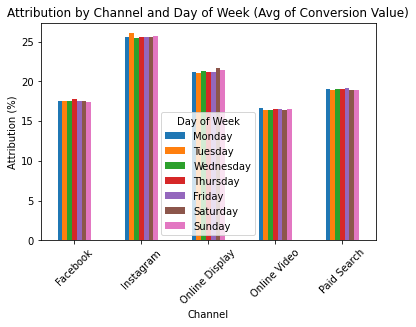

In [445]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

attribution_conversion_value_per_day = {}

for day, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['day_of_week'] == day
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
    adjusted_channel_conversion_value = conversions[mask].groupby('channel')['conversion_value_adjusted'].mean()
    total_conversion_value = adjusted_channel_conversion_value.sum()
    attribution_conversion_value = (adjusted_channel_conversion_value / total_conversion_value) * 100
    attribution_conversion_value_per_day[day] = attribution_conversion_value

attribution_data = pd.DataFrame(attribution_conversion_value_per_day).sort_index(axis=1)
attribution_data.columns = day_names

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution (%)')
plt.title('Attribution by Channel and Day of Week (Avg of Conversion Value)')
plt.xticks(rotation=45)
plt.legend(title='Day of Week')
plt.show()

<Figure size 720x432 with 0 Axes>

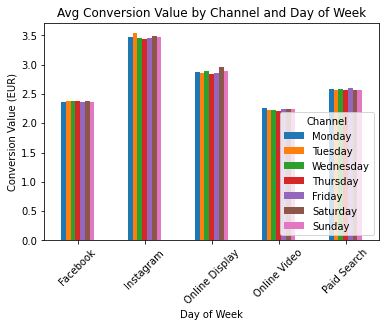

In [446]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

for day, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['day_of_week'] == day
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values

adjusted_channel_conversion_value = conversions.groupby(['channel', 'day_of_week'])['conversion_value_adjusted'].mean().unstack()
adjusted_channel_conversion_value = adjusted_channel_conversion_value.rename(columns=dict(enumerate(day_names)))

plt.figure(figsize=(10, 6))
adjusted_channel_conversion_value.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Value (EUR)')
plt.title('Avg Conversion Value by Channel and Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Channel', loc='lower right', ncol=1)
plt.show()

<a id='hourly'></a>
### Attribution on an Hourly Level

In [447]:
transition_matrices = {}

for hour_group in df['hour_group'].unique():
    df_hour_group = df[df['hour_group'] == hour_group]
    transition_matrix_hour_group = pd.DataFrame(index=channels, columns=channels, dtype=float)

    for channel in channels:
        channel_counts = df_hour_group[df_hour_group['channel'] == channel]['next_channel'].value_counts()
        transition_matrix_hour_group.loc[channel] = channel_counts
    transition_matrices[hour_group] = transition_matrix_hour_group

In [448]:
attribution_adjustments = {}

for hour_group, transition_matrix in transition_matrices.items():
    attribution_weight_adjustment = pd.DataFrame(np.ones_like(transition_matrix.values),
                                                index=transition_matrix.index,
                                                columns=transition_matrix.columns)

    for channel, _ in transition_matrix.iterrows():
        attribution_weight_adjustment.loc[channel] = 0
        remaining_weights_sum = attribution_weight_adjustment.sum(axis=1).values
        remaining_weights_sum[remaining_weights_sum == 0] = 1
        attribution_weight_adjustment.loc[channel] = 1 / remaining_weights_sum

    attribution_weight_adjustment = attribution_weight_adjustment.div(attribution_weight_adjustment.sum(axis=1),
                                                                     axis=0)
    attribution_adjustments[hour_group] = attribution_weight_adjustment

In [449]:
conversion_rate_per_hour_group = {}

for hour_group, attribution_adjustment in attribution_adjustments.items():
    conversions = df[df['conversion'] == 1]
    conversion_counts = conversions[conversions['hour_group'] == hour_group]['channel'].value_counts()
    interaction_counts = df[df['hour_group'] == hour_group]['channel'].value_counts()
    conversion_rate = (conversion_counts / interaction_counts) * 100

    attribution_adjusted_conversion_rate = conversion_rate * attribution_adjustment
    conversion_rate_per_hour_group[hour_group] = attribution_adjusted_conversion_rate

In [450]:
unique_channels = set()
for conversion_counts in conversion_rate_per_day.values():
    unique_channels.update(conversion_counts.index)
adjusted_conversion_rate_data = pd.DataFrame(columns=unique_channels)

for day, conversion_counts in conversion_rate_per_day.items():
    conversion_counts_df = pd.DataFrame(conversion_counts).transpose()
    conversion_counts_df = conversion_counts_df.reindex(columns=unique_channels)
    adjusted_conversion_rate_data.loc[day_of_week_mapping[day]] = conversion_counts_df.values[0]
adjusted_conversion_rate_data.index.name = 'Day'

<Figure size 720x432 with 0 Axes>

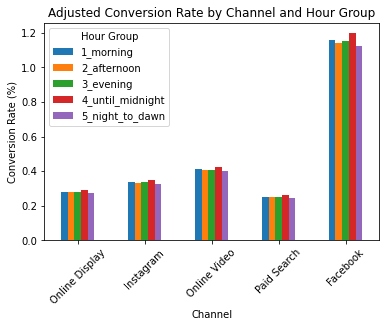

In [451]:
hour_group_order = ['1_morning', '2_afternoon', '3_evening', '4_until_midnight', '5_night_to_dawn']

unique_channels = set()
for conversion_counts in conversion_rate_per_hour_group.values():
    unique_channels.update(conversion_counts.index)
adjusted_conversion_rate_data = pd.DataFrame(columns=unique_channels)

for hour_group, conversion_counts in conversion_rate_per_hour_group.items():
    conversion_counts_df = pd.DataFrame(conversion_counts).transpose()
    conversion_counts_df = conversion_counts_df.reindex(columns=unique_channels)
    adjusted_conversion_rate_data.loc[hour_group_order.index(hour_group) + 1] = conversion_counts_df.values[0]
adjusted_conversion_rate_data.index.name = 'Hour Group'
adjusted_conversion_rate_data.rename(index={i+1: hour_group_order[i] for i in range(len(hour_group_order))}, inplace=True)
adjusted_conversion_rate_data = adjusted_conversion_rate_data.reindex(hour_group_order)

plt.figure(figsize=(10, 6))
adjusted_conversion_rate_data.transpose().plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.title('Adjusted Conversion Rate by Channel and Hour Group')
plt.xticks(rotation=45)
plt.legend(title='Hour Group')
plt.show()

<Figure size 720x432 with 0 Axes>

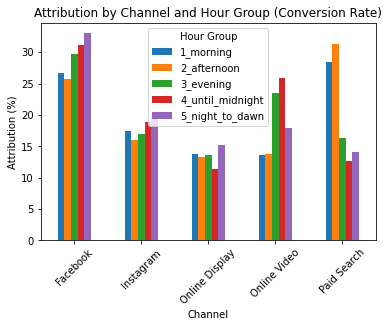

In [452]:
conversions = df[df['conversion'] == 1]

attribution_conversion_rate_per_hour_group = {}
for hour_group, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['hour_group'] == hour_group
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_count_adjusted'] = 1 * adjustment_values
    adjusted_channel_conversion_count = conversions[mask].groupby('channel')['conversion_count_adjusted'].sum()
    total_conversions = adjusted_channel_conversion_count.sum()
    attribution_conversion_rate = adjusted_channel_conversion_count / total_conversions * 100
    attribution_conversion_rate_per_hour_group[hour_group] = attribution_conversion_rate
    
attribution_data = pd.DataFrame(attribution_conversion_rate_per_hour_group)
hour_group_order = ['1_morning', '2_afternoon', '3_evening', '4_until_midnight', '5_night_to_dawn']
attribution_data = attribution_data.reindex(columns=hour_group_order)

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution (%)')
plt.title('Attribution of Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Hour Group')
plt.show()


# 페이스북의 conversion rate, attribution 모두 월등히 높다. 즉시 사도록 하는 모티베이트 하는 것과 다음 광고를 볼 때 구매 확률을 동시에 높임. 
# attribution의 경우 오전보다 오후, 저녁에 보는 광고가 다음 광고의 효율성을 높이는 패턴. 보통 퇴근 후 소셜미디어나 유튜브를 확인하니, 그때 광고를 보고
# 다음에 볼 때 전환하는 것.
# paid search는 반대. 아침, 점심에 검색하면서 본 paid search가 기억에 남아 당장 사진 않아도 다음에 볼 때 구매로 이어지는 패턴.
# paid search와 달리 online video가 evening 부터 midnight까지 exceptionally하게 잘한다. 기억에 남기는걸 잘한다.

<Figure size 720x432 with 0 Axes>

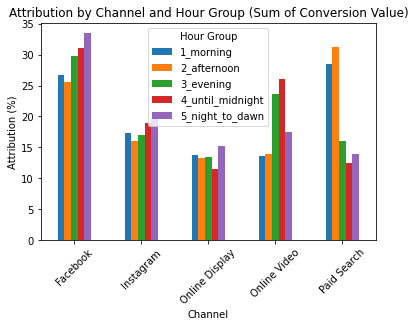

In [453]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

attribution_conversion_value_per_hour_group = {}
for hour_group, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['hour_group'] == hour_group
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
    adjusted_channel_conversion_value = conversions[mask].groupby('channel')['conversion_value_adjusted'].sum()
    attribution_conversion_value = adjusted_channel_conversion_value / adjusted_channel_conversion_value.sum() * 100
    attribution_conversion_value_per_hour_group[hour_group] = attribution_conversion_value
attribution_data = pd.DataFrame(attribution_conversion_value_per_hour_group)
attribution_data = attribution_data[hour_group_order]

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution (%)')
plt.title('Attribution of Total of Conversion Value')
plt.xticks(rotation=45)
plt.legend(title='Hour Group')
plt.show()

<Figure size 720x432 with 0 Axes>

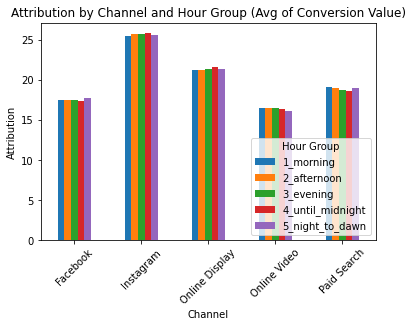

In [454]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

attribution_conversion_value_per_hour_group = {}
for hour_group, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['hour_group'] == hour_group
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
    adjusted_channel_conversion_value = conversions[mask].groupby('channel')['conversion_value_adjusted'].mean()
    total_conversion_value = adjusted_channel_conversion_value.sum()
    attribution_conversion_value = (adjusted_channel_conversion_value / total_conversion_value) * 100
    attribution_conversion_value_per_hour_group[hour_group] = attribution_conversion_value
    
attribution_data = pd.DataFrame(attribution_conversion_value_per_hour_group)
attribution_data = attribution_data[hour_group_order]

plt.figure(figsize=(10, 6))
attribution_data.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Attribution')
plt.title('Attribution of Average of Conversion Value')
plt.xticks(rotation=45)
plt.legend(title='Hour Group', loc = 'lower right')
plt.show()

<Figure size 720x432 with 0 Axes>

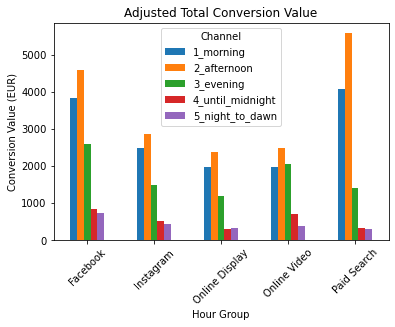

In [478]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

for hour_group, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['hour_group'] == hour_group
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
adjusted_channel_conversion_value = conversions.groupby(['channel', 'hour_group'])['conversion_value_adjusted'].sum().unstack()
adjusted_channel_conversion_value = adjusted_channel_conversion_value[hour_group_order]

plt.figure(figsize=(10, 6))
adjusted_channel_conversion_value.plot(kind='bar')
plt.xlabel('Hour Group')
plt.ylabel('Conversion Value (EUR)')
plt.title('Adjusted Total Conversion Value')
plt.xticks(rotation=45)
plt.legend(title='Channel', loc='upper center', ncol=1)
plt.show()


# ??????


# 주문 오더수로 해석할 수 있음.
# 아침과 점심에 많은 사람들이 쇼핑하고 evening부터 점차 쇼핑수가 줄어드는 패턴 (퇴근 후 집에서 쉬기 위해?)
## paid search 특히 이 경향이 매우 뚜렷해, 아침과 점심에 액티브하게 서치해서 쇼핑 끝냄. 그 이후 시간에는 상대적으로 주문이 적다.
# 하지만 오후에 보는 광고들이 attribution 높음을 통해, 오후에 거쳐간 광고들이 다음날 아침 실제 구매로 진행됨 유추. except for paid search
# paid search가 주문수에 비해 앞에서 conversion rate가 낮았다는 것을 기억하면, 주문을 완료하기 어려운 UI로 되어있을지도 모른다.
# online video가 conversion rate잘한것처럼 주문수도 evening 부터 midnight까지 exceptionally하게 잘한다. 

<Figure size 432x720 with 0 Axes>

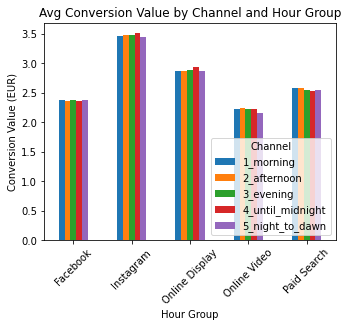

In [456]:
conversions = df[df['conversion'] == 1]
conversions['conversion_value_adjusted'] = conversions['conversion_value']

for hour_group, attribution_adjustment in attribution_adjustments.items():
    mask = conversions['hour_group'] == hour_group
    channel_column = conversions.loc[mask, 'channel']
    adjustment_values = attribution_adjustment.lookup(channel_column, channel_column)
    adjustment_values = np.nan_to_num(adjustment_values, nan=1.0)
    conversions.loc[mask, 'conversion_value_adjusted'] *= adjustment_values
adjusted_channel_conversion_value = conversions.groupby(['channel', 'hour_group'])['conversion_value_adjusted'].mean().unstack()
adjusted_channel_conversion_value = adjusted_channel_conversion_value[hour_group_order]

plt.figure(figsize=(6, 10))
adjusted_channel_conversion_value.plot(kind='bar')
plt.xlabel('Hour Group')
plt.ylabel('Conversion Value (EUR)')
plt.title('Adjusted Average Conversion Value')
plt.xticks(rotation=45)
plt.legend(title='Channel', loc='lower right', ncol=1)
plt.subplots_adjust(right=0.8)  
plt.show()

## 매체별 고객 특성 purchase pattern 알 수 있음
# 가장 높은 willingness to buy가졌을 paid search보다 instagram 유저가 더 많은 금액을 지불한다
# 페이스북의 엄청난 오더 수와 달리, 평균 주문 금액은 그리 높지 않음

<a id='conclusion'></a>
### Conclusion

In [458]:
# By examining both the adjusted conversion rate and the adjusted attribution, 
# you can gain insights into different aspects of your marketing strategy. 
# The adjusted conversion rate helps you understand the effectiveness of each channel in driving conversions, 
# while the adjusted attribution provides insights into the relative importance and impact of each channel in the overall conversion process.

# Comparing these two metrics can help you identify channels that perform well in terms of conversion rate but may receive lower attribution, 
# or channels that have high attribution but lower conversion rates. 
# This information can guide your decision-making process when allocating resources and optimizing your marketing efforts.

In [459]:
# action plans

In [460]:
# What did I learn from this project, and how did I learn? 
# what mistakes did I make? what was the difficult part?
# what could have been done better? 
# learned from marketing blogs (e.g.hubspot), kaggle notebook to see expected output
# in terms of tricky coding, asked for a help to colleagues
# thought process